In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
datapath = '/home/hky/Data/chenxu/MCmodelBany4.npz'

data = np.load(datapath)
for i in data.keys():
    print(i)

pri_e_num
pri_id
pri_e
pri_theta
pri_phi
pri_ne
pri_core_x
pri_core_y
pri_sump
pri_n_hit
Tibetevent
Tibet
MDevent
MD


In [3]:
pri_e_num = data['pri_e_num']
pri_id = data['pri_id']
pri_e = data['pri_e']
pri_theta = data['pri_theta']
pri_phi = data['pri_phi']
pri_ne = data['pri_ne']
pri_core_x = data['pri_core_x']
pri_core_y = data['pri_core_y']
pri_sump = data['pri_sump']
pri_n_hit = data['pri_n_hit']
Tibetevent = data['Tibetevent']
Tibet = data['Tibet']
MDevent = data['MDevent']
MD = data['MD']

In [4]:
pri_id_list = list(set(pri_id))

In [6]:
pri_id_list.sort()

In [7]:
pri_id_list

[14, 402, 1206, 1407, 1608, 2010, 2412, 2814, 3216, 4018, 4020, 5626]

In [8]:
calibfile = "/home/hky/for_mengy3/src16_1.8/userfile/mccaliblmzhai_20190312.cal"
detid = list()
x = list()
y = list()
z = list()

with open(calibfile, "r") as f:
    for line in f:
        detid.append(int(line.split()[0]))
        x.append(float(line.split()[1]))
        y.append(float(line.split()[2]))
        z.append(float(line.split()[3]))
detid = np.array(detid)
x = np.array(x)
y = np.array(y)
z = np.array(z)

In [6]:
goodevent = list()
count = 0
for i in range(pri_id.shape[0]):
    if (-50 < pri_core_x[i] < 50) and (-50 < pri_core_y[i] < 50) and (pri_n_hit[i] > 300):
        goodevent.append(i)
        count += 1
        # if count == 100:
        #     break

In [20]:
# goodevent = [10]


In [7]:
len(goodevent)

769

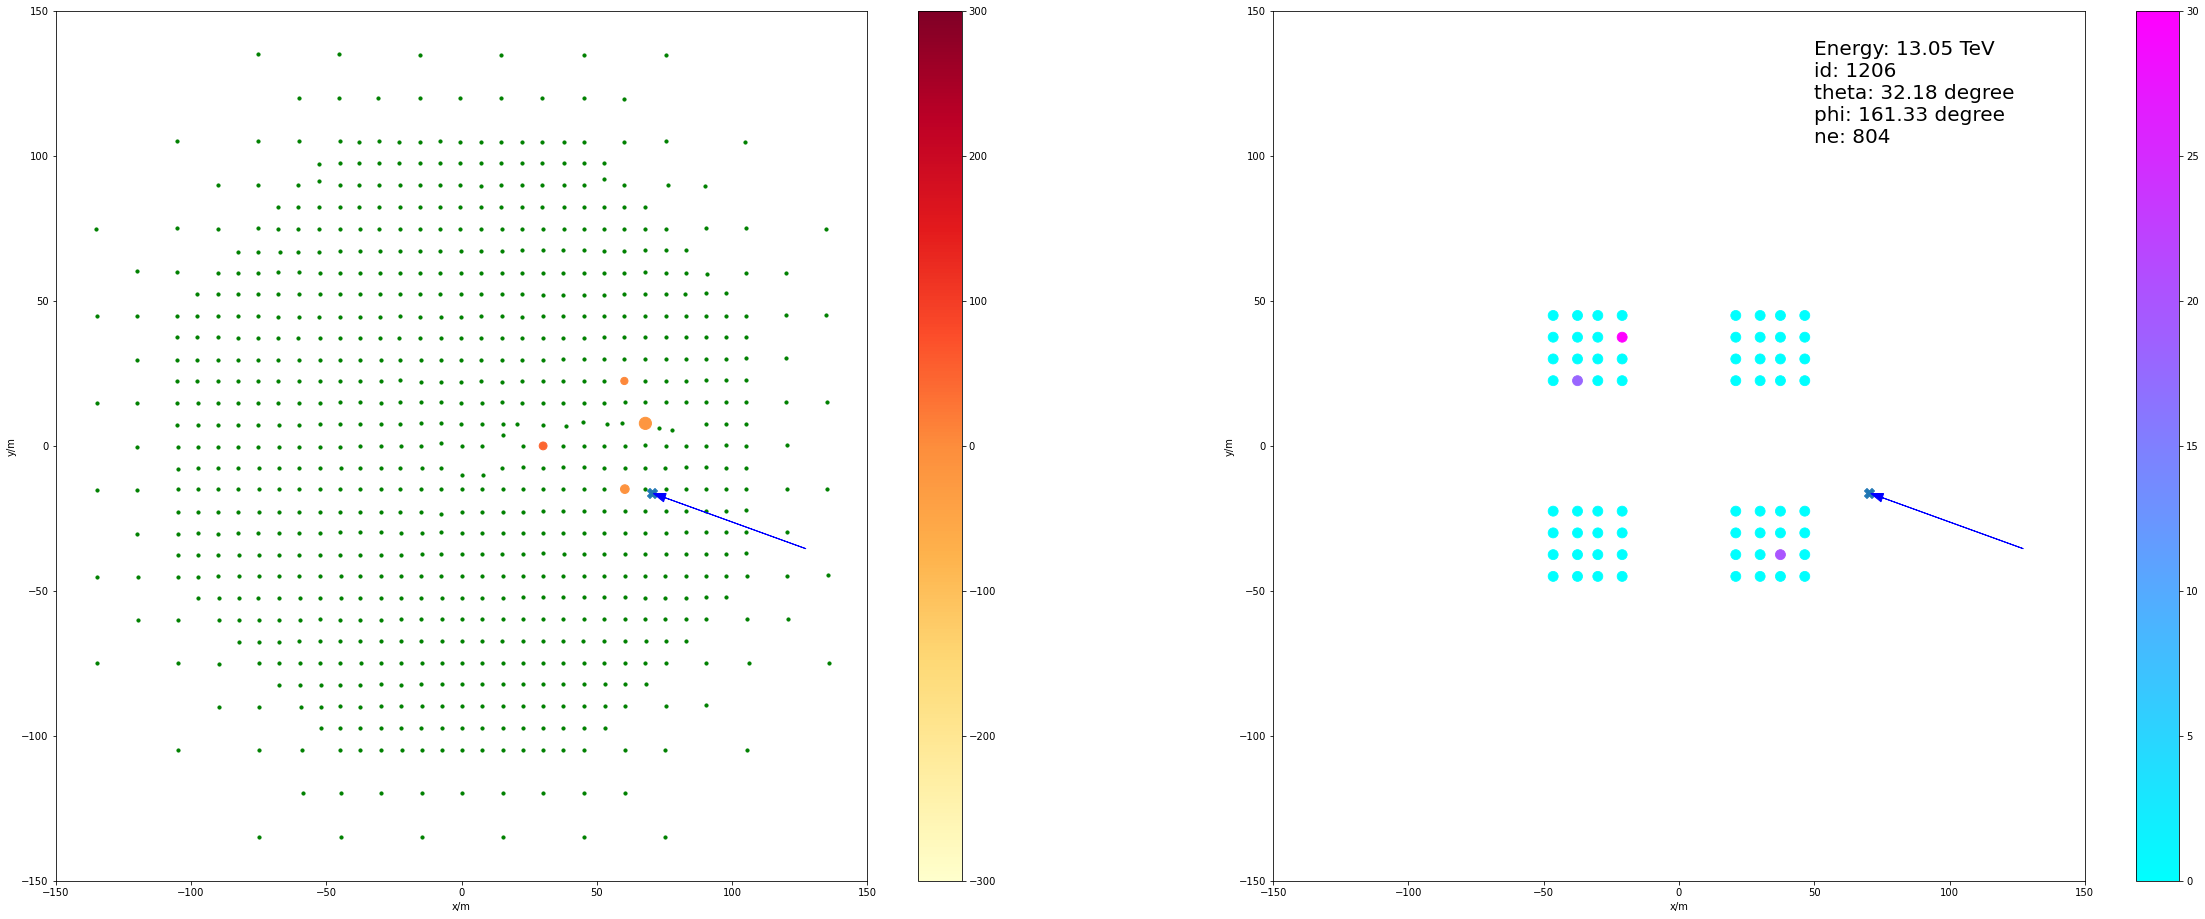

In [21]:
for ind in goodevent:
    plt.figure(figsize=(40, 16))
    plt.subplot(1, 2, 1)
    Tibet_location_x = x[:996]
    Tibet_location_y = y[:996]
    Tibet_c = np.zeros(996)
    Tibet_s = np.ones(996)
    time = list()
    for i in Tibet[int(Tibetevent[ind]):int(Tibetevent[ind + 1]), :]:
        if i[0] == ind:
            if (i[3] <= 300) and (i[3] >= -300) and (i[2] > 0.6):
                Tibet_c[int(i[1])] = i[3]
                Tibet_s[int(i[1])] += np.log(i[2] / 0.6)
                time.append(i[3])
    Tibet_location_x = np.concatenate([[0], x[:996][np.where(x[:996] != 0)]])
    Tibet_location_y = np.concatenate([[0], y[:996][np.where(x[:996] != 0)]])
    Tibet_c = np.concatenate([[Tibet_c[0]], Tibet_c[np.where(x[:996] != 0)]])
    Tibet_s = np.concatenate([[Tibet_s[0]], Tibet_s[np.where(x[:996] != 0)]])

    cmap = cm.YlOrRd
    plt.scatter(
        Tibet_location_x[np.where(Tibet_c != 0)],
        Tibet_location_y[np.where(Tibet_c != 0)],
        s=Tibet_s[np.where(Tibet_c != 0)] * 50,
        c=Tibet_c[np.where(Tibet_c != 0)],
        cmap=cmap,
        # alpha=4 / 5,
    )

    plt.clim(-300, 300)
    plt.colorbar()
    plt.scatter(
        Tibet_location_x[np.where(Tibet_c == 0)],
        Tibet_location_y[np.where(Tibet_c == 0)],
        s=10,
        c='g',
        # alpha=4 / 5,
    )
    plt.scatter(pri_core_x[ind], pri_core_y[ind], marker='X', s=100, linewidths=1)
    arrowlength = 60
    plt.arrow(pri_core_x[ind] - arrowlength * np.cos(pri_phi[ind] + np.deg2rad(90 - 17.97)),
              pri_core_y[ind] - arrowlength * np.sin(pri_phi[ind] + np.deg2rad(90 - 17.97)),
              (arrowlength - 5) * np.cos(pri_phi[ind] + np.deg2rad(90 - 17.97)),
              (arrowlength - 5) * np.sin(pri_phi[ind] + np.deg2rad(90 - 17.97)),
              head_width=3,
              fc='b',
              ec='b')

    plt.xlim(-150, 150)
    plt.ylim(-150, 150)
    plt.xlabel('x/m')
    plt.ylabel('y/m')
    # plt.show()

    plt.subplot(1, 2, 2)

    MD_location_x = list()
    MD_location_y = list()
    MD_c = list()
    MD_tmp = np.zeros([4 * 16 * 4])
    for i in MD[int(MDevent[ind]):int(MDevent[ind + 1]), :]:
        MD_tmp[int(i[1])] = i[2]
    MD_tmp = MD_tmp.reshape(4, 16, 4)

    for i in range(4):
        for j in range(16):
            MD_c.append(MD_tmp[i, j, 0])
            MD_location_x.append(x[(i + 1) * 1000 + j * 10])
            MD_location_y.append(y[(i + 1) * 1000 + j * 10])

    # plt.figure(figsize=(20, 16))

    cmapMD = cm.cool

    plt.scatter(
        MD_location_x,
        MD_location_y,
        c=MD_c,
        cmap=cmapMD,
        # edgecolors='b',
        linewidths=0.8,
        s=100,
        # alpha=0.5
    )
    # plt.clim(-3000, 3000)
    plt.colorbar()

    plt.scatter(pri_core_x[ind], pri_core_y[ind], marker='X', s=100, linewidths=1)
    arrowlength = 60
    plt.arrow(pri_core_x[ind] - arrowlength * np.cos(pri_phi[ind] + np.deg2rad(90 - 17.97)),
              pri_core_y[ind] - arrowlength * np.sin(pri_phi[ind] + np.deg2rad(90 - 17.97)),
              (arrowlength - 5) * np.cos(pri_phi[ind] + np.deg2rad(90 - 17.97)),
              (arrowlength - 5) * np.sin(pri_phi[ind] + np.deg2rad(90 - 17.97)),
              head_width=3,
              fc='b',
              ec='b')
    plt.xlim(-150, 150)
    plt.ylim(-150, 150)
    plt.xlabel('x/m')
    plt.ylabel('y/m')

    plt.text(
        50,
        140,
        f'Energy: {pri_e[ind]/1000:5.2f} TeV\n'
        f'id: {pri_id[ind]}\n'
        f'theta: {np.rad2deg(pri_theta[ind]):5.2f} degree\n'
        f'phi: {np.rad2deg(pri_phi[ind]+ np.deg2rad(90 - 17.97)):5.2f} degree\n'
        f'ne: {pri_ne[ind]}',
        fontsize=20,
        verticalalignment="top",
        horizontalalignment="left",
    )
    plt.show()

    # print('theta', np.rad2deg(pri_theta[ind]), 'phi', np.rad2deg(pri_phi[ind]) + 90 - 17.97)
    plt.savefig(f'/home/hky/github/Identification_CR/P00_readMCdata/fig/{pri_id[ind]}_{int(pri_e[ind]/1000)}_event{ind}.png')
    plt.close()


In [8]:
import numpy as np

In [22]:
a= [np.array([[1,2],[2,3]]),np.array([[2,3]])]

In [29]:
np.exp(np.concatenate(a,axis=0))

array([[ 2.71828183,  7.3890561 ],
       [ 7.3890561 , 20.08553692],
       [ 7.3890561 , 20.08553692]])

In [30]:
T = np.arange(0,1+0.01,0.01)

In [31]:
T

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])